# Assignment 2

### <strong> Creating KNN classifier from scratch without using any librabries and use Euclidean, Normal Euclidean, Cosine distance to find the optimal hyperparameter to find the distance between two vector points. </strong>

<strong>A. Divide the dataset as development and test. Because kNN does not require training you don’t have a train dataset. Make sure randomly divide the dataset.</strong>

Since we are not going to use libraries like numpy, we are iterating through 'for' loop to create a 2d array stricture for the dataset imported from website:  https://archive.ics.uci.edu/ml/datasets/Iris 

In [1]:
file = open("iris.data", "r+")
dataset=[]
total_data=0
#dataset=list()
print("Output of Read function is:\n ")
for row in file:
    total_data=total_data+1
    if(row!='\n'):#excluding empty rows
        new_row=row.strip()#removing tailing empty space
        dataset.append(new_row.split(','))#using split created each row into array separated by a comma
print(dataset)

Output of Read function is:
 
[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'], ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'], ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'], ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'], ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'], ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'], ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'], ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'], ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'], ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'], ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'], ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'], ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'], ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'], ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'], ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'], ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'], ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'], ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'], ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'], ['5.1', '3.7', '1.5', '0

Defining a function to fetch column from 2d array using column number:

In [2]:
#Function to fetch column data
def get_coulmn_data(box, i):
    return [row[i] for row in box]
print("Display result column: \n")
print(get_coulmn_data(dataset,4))

Display result column: 

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolo

In [3]:
#get unique flowers list:
flowers={}
count=1
for flower in get_coulmn_data(dataset,4):
    if flower not in flowers:
        flowers[flower]=count
        count=count+1
print("Flowers dictionary created:\n")
print(flowers)        

Flowers dictionary created:

{'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}


In [4]:
#Romdomly shuffle the rows 
import random  
random.shuffle(dataset)
print("Dataset after random shuffling:\n")
print(dataset)

Dataset after random shuffling:

[['6.0', '2.2', '5.0', '1.5', 'Iris-virginica'], ['6.2', '2.2', '4.5', '1.5', 'Iris-versicolor'], ['6.5', '3.0', '5.8', '2.2', 'Iris-virginica'], ['7.9', '3.8', '6.4', '2.0', 'Iris-virginica'], ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'], ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'], ['6.5', '2.8', '4.6', '1.5', 'Iris-versicolor'], ['4.8', '3.1', '1.6', '0.2', 'Iris-setosa'], ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'], ['6.4', '2.9', '4.3', '1.3', 'Iris-versicolor'], ['6.5', '3.0', '5.2', '2.0', 'Iris-virginica'], ['5.1', '2.5', '3.0', '1.1', 'Iris-versicolor'], ['5.8', '2.7', '3.9', '1.2', 'Iris-versicolor'], ['5.8', '2.6', '4.0', '1.2', 'Iris-versicolor'], ['7.2', '3.0', '5.8', '1.6', 'Iris-virginica'], ['5.0', '3.0', '1.6', '0.2', 'Iris-setosa'], ['4.9', '2.4', '3.3', '1.0', 'Iris-versicolor'], ['5.5', '2.5', '4.0', '1.3', 'Iris-versicolor'], ['5.4', '3.4', '1.5', '0.4', 'Iris-setosa'], ['5.5', '2.4', '3.7', '1.0', 'Iris-versicolor'], ['6.6', '3.0', 

In [5]:
#feature engineering last row to numeric values
for row in dataset:
    row[4]=flowers[row[4]] 
print("Changing flower names to numeric representation:\n")    
print(dataset)    

Changing flower names to numeric representation:

[['6.0', '2.2', '5.0', '1.5', 3], ['6.2', '2.2', '4.5', '1.5', 2], ['6.5', '3.0', '5.8', '2.2', 3], ['7.9', '3.8', '6.4', '2.0', 3], ['4.9', '3.0', '1.4', '0.2', 1], ['5.4', '3.9', '1.3', '0.4', 1], ['6.5', '2.8', '4.6', '1.5', 2], ['4.8', '3.1', '1.6', '0.2', 1], ['5.1', '3.8', '1.5', '0.3', 1], ['6.4', '2.9', '4.3', '1.3', 2], ['6.5', '3.0', '5.2', '2.0', 3], ['5.1', '2.5', '3.0', '1.1', 2], ['5.8', '2.7', '3.9', '1.2', 2], ['5.8', '2.6', '4.0', '1.2', 2], ['7.2', '3.0', '5.8', '1.6', 3], ['5.0', '3.0', '1.6', '0.2', 1], ['4.9', '2.4', '3.3', '1.0', 2], ['5.5', '2.5', '4.0', '1.3', 2], ['5.4', '3.4', '1.5', '0.4', 1], ['5.5', '2.4', '3.7', '1.0', 2], ['6.6', '3.0', '4.4', '1.4', 2], ['4.9', '3.1', '1.5', '0.1', 1], ['5.0', '3.5', '1.3', '0.3', 1], ['6.3', '2.3', '4.4', '1.3', 2], ['5.0', '3.6', '1.4', '0.2', 1], ['5.5', '4.2', '1.4', '0.2', 1], ['5.6', '3.0', '4.5', '1.5', 2], ['5.7', '4.4', '1.5', '0.4', 1], ['6.3', '2.5', '5.0', '1.

In [6]:
#Split the dataset in the ratio of 70:30 developing and testing dataset
first_portion=70
dev_dataset=dataset[0:(int)((first_portion*total_data)/100)]
test_dataset=dataset[(int)((first_portion*total_data)/100)+1:]  
print("Dataset divided in development and testing datasets:\n") 
print("Developing Dataset:\n") 
print(dev_dataset) 
print("\nTesting Dataset:\n") 
print(test_dataset) 

Dataset divided in development and testing datasets:

Developing Dataset:

[['6.0', '2.2', '5.0', '1.5', 3], ['6.2', '2.2', '4.5', '1.5', 2], ['6.5', '3.0', '5.8', '2.2', 3], ['7.9', '3.8', '6.4', '2.0', 3], ['4.9', '3.0', '1.4', '0.2', 1], ['5.4', '3.9', '1.3', '0.4', 1], ['6.5', '2.8', '4.6', '1.5', 2], ['4.8', '3.1', '1.6', '0.2', 1], ['5.1', '3.8', '1.5', '0.3', 1], ['6.4', '2.9', '4.3', '1.3', 2], ['6.5', '3.0', '5.2', '2.0', 3], ['5.1', '2.5', '3.0', '1.1', 2], ['5.8', '2.7', '3.9', '1.2', 2], ['5.8', '2.6', '4.0', '1.2', 2], ['7.2', '3.0', '5.8', '1.6', 3], ['5.0', '3.0', '1.6', '0.2', 1], ['4.9', '2.4', '3.3', '1.0', 2], ['5.5', '2.5', '4.0', '1.3', 2], ['5.4', '3.4', '1.5', '0.4', 1], ['5.5', '2.4', '3.7', '1.0', 2], ['6.6', '3.0', '4.4', '1.4', 2], ['4.9', '3.1', '1.5', '0.1', 1], ['5.0', '3.5', '1.3', '0.3', 1], ['6.3', '2.3', '4.4', '1.3', 2], ['5.0', '3.6', '1.4', '0.2', 1], ['5.5', '4.2', '1.4', '0.2', 1], ['5.6', '3.0', '4.5', '1.5', 2], ['5.7', '4.4', '1.5', '0.4', 1], 

<strong>B.implement kNN using the following hyperparameters</strong>
* number of neighbor K 
    * 1,3,5,7
* distance metric
    * euclidean distance
    * normalized euclidean distance
    * cosine similarity



In [7]:
#Define functions to find distance between 2 vector: Euclidean, Normalised Euclidean(0,1), Cosine Similarity 

from math import *
def euclidean_distance(XVector,YVector):
    distance=0.0
    for i in range(len(XVector)-1):#-1 because we don't want to calculate the result
        distance=distance+(float(XVector[i])-float(YVector[i]))**2
    return sqrt(distance) 

def variance(Vector):
    #calculate mean
    mean = sum(Vector) / len(Vector)
    #calculate variance
    var=sum((k - mean) ** 2 for k in Vector) / len(Vector)
    return var

def normalised_euclidean_distance(XVector,YVector):
    diff=[]
    X=[]
    Y=[]
    
    for i in range(len(XVector)-1):#-1 because we don't want to calculate the result
        diff.append((float(XVector[i])-float(YVector[i]))**2)
        X.append(float(XVector[i]))
        Y.append(float(YVector[i]))
           
    #calculate norm euclidean dist
    ned=0.5*variance(diff)/(variance(X)+variance(Y))
    return ned 

def cosine_similarity(XVector,YVector):
    dot_product=0.0
    X_norm=0.0
    Y_norm=0.0
    for i in range(len(XVector)-1):
        dot_product=dot_product+(float(XVector[i])*float(YVector[i]))
        X_norm=X_norm+(float(XVector[i])**2)
        Y_norm=Y_norm+(float(YVector[i])**2)
    return 1-(dot_product/(sqrt(X_norm)*sqrt(Y_norm)))  

print("Euclidean_Distance testing:")
print(euclidean_distance(['5.0', '3.4', '1.5', '0.2', 1],['5.5', '3.5', '1.3', '0.2', 1]))

print("\nNormalised_Euclidean_Distance testing:")
print(normalised_euclidean_distance(['5.0', '3.4', '1.5', '0.2', 1],['5.5', '3.5', '1.3', '0.2', 1]))

print("\nCosine Distance testing:") 
print(cosine_similarity(['5.0', '3.4', '1.5', '0.2', 1],['5.0', '3.4', '1.5', '0.2', 1]))

Euclidean_Distance testing:
0.5477225575051661

Normalised_Euclidean_Distance testing:
0.0006946526736631684

Cosine Distance testing:
0.0


In [8]:
#find k neighbours 
def find_k_no_neighbours(vector,kvalue):
    vector.sort(key=lambda x:x[-1])
    return vector[1:kvalue+1]

#predicate class based on majority of neighbours
def predicate_class(top_neighbours):
    OutputList=get_coulmn_data(top_neighbours, 4)
    return max(set(OutputList), key=OutputList.count)

#calulate the accuracy of result
def calc_accuracy(expexted_values,predicted_values):
    count=0;
    for i in range(len(expexted_values)):
        if(expexted_values[i]==predicted_values[i]):
            count=count+1
    accuracy=(count*100)/len(expexted_values) 
    return accuracy

t_neighbour=[['5.6', '2.8', '4.9', '2.0', 1, 0.4898979485566353], 
             ['5.8', '2.7', '5.1', '1.9', 2, 0.5099019513592784], 
             ['5.8', '2.7', '5.1', '1.9', 2, 0.5099019513592784]]
print("Predicated class from neighbouring vector is:")
predicate_class(t_neighbour)

Predicated class from neighbouring vector is:


2

In [9]:
def Euclidean_KNN_Classifier(dataset,predicate_set,kvalue):
    predicate_set2=predicate_set.copy()
    predictated_values=[]
    for i in range(len(predicate_set2)):
        #print("i"+str(i))
        dataset2 = list(map(list, dataset))
        #dataset2=dataset.copy()
        for j in range(len(dataset2)):
            #print("j"+str(j))
            dataset2[j].append(euclidean_distance(predicate_set2[i],dataset2[j]))
        neighbours=find_k_no_neighbours(dataset2,kvalue)   
#         print("dataset2")
#         print(dataset2)
#         print("neighbours")
#         print(neighbours)
#         print("predicate_set2")
        predictated_values.append(predicate_class(neighbours))
        #print(predictated_values)
        #clearing distance value in appended in array before appending new column of distance:
        #dataset2=dataset2[:,-1]
        #[k.pop(-1) for k in dataset2] 
        #[k.pop(-1) for k in dataset] 
#         print("dataset2")
#         print(dataset2)
#     print(get_coulmn_data(predicate_set, 4))
#     print(predictated_values)
    accurate_rate=calc_accuracy(get_coulmn_data(predicate_set, 4),predictated_values)  
    return accurate_rate

print("Accuracy rate of Euclidean_KNN_Classifier:")
print(Euclidean_KNN_Classifier(dataset,dev_dataset,1))
            

Accuracy rate of Euclidean_KNN_Classifier:
95.23809523809524


In [10]:
def Cosine_KNN_Classifier(dataset,predicate_set,kvalue):
    predicate_set2=predicate_set.copy()
    predictated_values=[]
    for i in range(len(predicate_set2)):
        #print("i"+str(i))
        dataset2 = list(map(list, dataset))
        #dataset2=dataset.copy()
        for j in range(len(dataset2)):
            #print("j"+str(j))
            dataset2[j].append(cosine_similarity(predicate_set2[i],dataset2[j]))
        neighbours=find_k_no_neighbours(dataset2,kvalue)   
#         print("dataset2")
#         print(dataset2)
#         print("neighbours")
#         print(neighbours)
#         print("predicate_set2")
        predictated_values.append(predicate_class(neighbours))
#         print(predictated_values)
        #clearing distance value in appended in array before appending new column of distance:
        #dataset2=dataset2[:,-1]
        #[k.pop(-1) for k in dataset2] 
        #[k.pop(-1) for k in dataset] 
#         print("dataset2")
#         print(dataset2)
#     print(get_coulmn_data(predicate_set, 4))
#     print(predictated_values)
    accurate_rate=calc_accuracy(get_coulmn_data(predicate_set, 4),predictated_values)  
    return accurate_rate

print("Accuracy rate from Cosine_KNN_Classifier is:")
print(Cosine_KNN_Classifier(dataset,dev_dataset,9))

Accuracy rate from Cosine_KNN_Classifier is:
96.19047619047619


In [11]:
def Normalised_Euclidean_KNN_Classifier(dataset,predicate_set,kvalue):
    predicate_set2=predicate_set.copy()
    predictated_values=[]
    for i in range(len(predicate_set2)):
        #print("i"+str(i))
        dataset2 = list(map(list, dataset))
        #dataset2=dataset.copy()
        for j in range(len(dataset2)):
            #print("j"+str(j))
            dataset2[j].append(normalised_euclidean_distance(predicate_set2[i],dataset2[j]))
        neighbours=find_k_no_neighbours(dataset2,kvalue)   
#         print("dataset2")
#         print(dataset2)
#         print("neighbours")
#         print(neighbours)
#         print("predicate_set2")
        predictated_values.append(predicate_class(neighbours))
        #print(predictated_values)
        #clearing distance value in appended in array before appending new column of distance:
        #dataset2=dataset2[:,-1]
        #[k.pop(-1) for k in dataset2] 
        #[k.pop(-1) for k in dataset] 
#         print("dataset2")
#         print(dataset2)
#     print(get_coulmn_data(predicate_set, 4))
#     print(predictated_values)
    accurate_rate=calc_accuracy(get_coulmn_data(predicate_set, 4),predictated_values)  
    return accurate_rate

print("Accuracy rate from Normalised_Euclidean_KNN_Classifier is:")
print(Normalised_Euclidean_KNN_Classifier(dataset,dev_dataset,7))
            

Accuracy rate from Normalised_Euclidean_KNN_Classifier is:
98.0952380952381


<strong>C. Using the development dataset</strong>
* Calculate accuracy by iterating all of the development data point
* Find optimal hyperparameters
    * Draw bar charts for accuracy


Euclidean & k1 is: 95.23809523809524
Normalized Euclidean & k1 is: 97.14285714285714
Cosine & k1 is: 95.23809523809524
Euclidean & k3 is: 94.28571428571429
Normalized Euclidean & k3 is: 96.19047619047619
Cosine & k3 is: 94.28571428571429
Euclidean & k5 is: 95.23809523809524
Normalized Euclidean & k5 is: 98.0952380952381
Cosine & k5 is: 97.14285714285714
Euclidean & k7 is: 95.23809523809524
Normalized Euclidean & k7 is: 98.0952380952381
Cosine & k7 is: 96.19047619047619


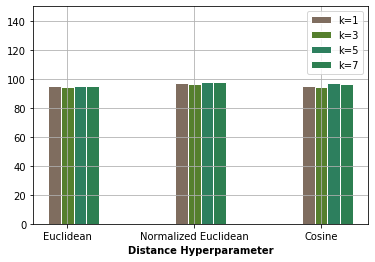

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
kvalue=[1,3,5,7]

#calc accuracy considering hyperparameters k and distances
dist_hyper = ["Euclidean","Normalized Euclidean","Cosine"]

# print(len(dist_hyper))
# print(len(kvalue))
k=[]
for i in range(len(kvalue)):
    m=[]
    m.append(Euclidean_KNN_Classifier(dataset,dev_dataset,i+1))
    m.append(Normalised_Euclidean_KNN_Classifier(dataset,dev_dataset,i+1))
    m.append(Cosine_KNN_Classifier(dataset,dev_dataset,i+1))
    k.append(m)   

# print("Matrix kvalue X distance_methods:")
# print(k)#we have created kvalue X distance_methods martix to find accuracy rate to plot in bar graph:
for i in range(len(kvalue)):
    for j in range(len(dist_hyper)):
        #print(str(j))
        print(str(dist_hyper[j])+" & k"+str(kvalue[i])+" is: "+str(k[i][j]))

# set width of bar
barWidth = 0.1
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]

# Set position of bar on X axis
r1 = np.arange(len(k[0]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, k[0], color='#7f6d5f', width=barWidth, edgecolor='white', label='k=1')
plt.bar(r2, k[1], color='#557f2d', width=barWidth, edgecolor='white', label='k=3')
plt.bar(r3, k[2], color='#2d7f5e', width=barWidth, edgecolor='white', label='k=5')
plt.bar(r4, k[3], color='#2d7f51', width=barWidth, edgecolor='white', label='k=7')

# Add xticks on the middle of the group bars
plt.xlabel('Distance Hyperparameter', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(k[0]))], dist_hyper)

plt.ylim(0,150)
plt.grid()

# Create legend & Show graphic
plt.legend()
plt.show()


<strong>D. Using the test dataset</strong>
* Use the optimal hyperparameters you found in the step c, and use it to calculate the final accuracy.  

Based on Graph above K=7 and Normalized Euclidean distance have highest accuracy rate among all other hyperparameter

In [14]:
#test on test data
print("Final accuracy:")
print(Normalised_Euclidean_KNN_Classifier(dataset,test_dataset,7))

Final accuracy:
97.72727272727273


Reference:
KNN:https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm<br/>Reading a file from python:https://www.geeksforgeeks.org/reading-writing-text-files-python/
 <br/> Coding Approach1: https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
 <br/> Coding Approach2: https://towardsdatascience.com/lets-make-a-knn-classifier-from-scratch-e73c43da346d
 <br/> Get Column data: https://stackoverflow.com/questions/903853/how-do-you-extract-a-column-from-a-multi-dimensional-array
<br/>  Cosine Similarity: https://skipperkongen.dk/2018/09/19/cosine-similarity-in-python/
 <br/> Clone 2d array without disturbing original without any libraries: https://stackoverflow.com/questions/6532881/how-to-make-a-copy-of-a-2d-array-in-python
 <br/> Find repeated integer in list: https://www.quora.com/How-do-I-find-the-most-repeated-integer-in-a-list-in-python
<br/>  Bar chart: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
 <br/> Bar chart2: https://python-graph-gallery.com/11-grouped-barplot/
 <br/> Delete column: https://www.geeksforgeeks.org/python-column-deletion-from-list-of-lists/
 <br/> Mean & Variance: http://stackoverflow.com/questions/35583302/how-can-i-calculate-the-variance-of-a-list-in-python/35583512